# Data Science Final Project
__Catherine Lukner <br>
Data Science Fall 2019__ <br>

## Part 1: Reconstruction
The task of Part 1 was to put a mess of data in multiple directorys into a single CSV file and save as `final_project/data.csv`. 

My tools in the reconstruction process were Python, Pandas, and a Jupyter notebook. 
The steps of my reconstruction process are as follows:
1. I uploaded all my files to my final project directory.
2. I imported pandas and walk from os. 
3. I wrote the following function that could return and sort a list which would then be used in the function for step 4:
```python
def sort_list(list):
    list.sort()
    return list
```
4. I wrote the following function to combine all the files from a given directory into a single file:
```python
def combine_files(dir):
    filenames_list = []

    for (dirpath, dirnames, filenames) in walk(f'catherinelukner/{dir}'):
        filenames_list.extend(filenames)
        break
        
    sorted_filenames = sort_list(filenames_list)
    
    with open(f'catherinelukner/{dir}/combined_{dir}', 'w') as outfile:
        for fname in sorted_filenames:
            with open(f'catherinelukner/{dir}/'+fname, newline='\n') as infile:
                for line in infile:
                    outfile.write(line)
```
5. I ran this function on each feature directory.
6. I read in each directory's combined file as a csv using pandas. I specified the index column to be "N", "id", or "ID", depending on the first column's name. 
    - For the directory of feature 3, I had to specify the delimiter to be tabs - '\t'
7. I read in the labels file into a dataframe using pandas and specifies the "id" column as the index. 
8. After creating dataframes from each of the directorys' combined files, I wrote the following function which could correctly merge dataframes and set the index to be "id". 
```python
def merge_dfs(df1, df2):    
    initial_merge = pd.merge(left=df1, right=df2, left_on=df1.index, right_on=df2.index)
    merged_dfs = initial_merge.set_index('key_0')
    merged_dfs.index.name = 'id'
    return merged_dfs
```
9. I merged each data frame individually. Although I most likely could have used a loop, there was a manageable amount of dataframes which made me able to simply keep adding the dataframes onto each other. To understand this process, here is the code I used to merge the dataframes from directories 1, 2, and 3:
```python
merged_dir1_2 = merge_dfs(dir1_csv, dir2_csv)
merged_dir1_2_3 = merge_dfs(merged_dir1_2, dir3_csv)
```
I continued on this pattern until all the directories' dataframes were into a single dataframe.
10. As the final merge, I merged the dataframe with all the features with the dataframe for the labels using the following code:
```python
labels_merged = labels_csv.merge(merged_dir1_2_3_4_5, left_on=merged_dir1_2_3_4_5.index, right_index=True)
merged_dfs = labels_merged.set_index('key_0')
merged_dfs.index.name = 'id'
final_merged_dfs = merged_dfs.sort_index(axis=1)
final_merged_dfs.head()
```
I was left with a dataframe with 'id' as its index and each of the feature columns sorted by order and the label column listed last. 
11. I exported the final merged dataframe as the file `data.csv`

## Part 2: Exploratory Analysis

The task of part two was to find which features are most correlated with the final label values. Before starting any analysis, I performed the necessary imports and read in my data csv file. I then modified the dataframe, specifically the categorical data, using `.get_dummies()` to be able to perform numerical analysis on these categorical features. 

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data = pd.read_csv('data', index_col='id')
data.head()

,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,label
id,,,,,,,,,,,,,,
1,39,v06,v09,13,v04,v00,v01,v04,v01,2174,0,40,v38,0
2,50,v05,v09,13,v02,v03,v00,v04,v01,0,0,13,v38,0
3,38,v03,v11,9,v00,v05,v01,v04,v01,0,0,40,v38,0
4,53,v03,v01,7,v02,v05,v00,v02,v01,0,0,40,v38,0
6,28,v03,v09,13,v02,v09,v05,v02,v00,0,0,40,v04,0


In [67]:
data_w_dummies = data
categorical_cols = ['feature_01', 'feature_02', 'feature_04', 
                   'feature_05', 'feature_06', 'feature_07', 'feature_08',
                   'feature_12']

for feature in categorical_cols:
    data.dropna()
    data_w_dummies[feature] = data[feature].str.get_dummies()

data_w_dummies.head()

,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,label
id,,,,,,,,,,,,,,
1,39,0,0,13,0,1,0,0,0,2174,0,40,0,0
2,50,0,0,13,0,0,1,0,0,0,0,13,0,0
3,38,0,0,9,1,0,0,0,0,0,0,40,0,0
4,53,0,0,7,0,0,1,0,0,0,0,40,0,0
6,28,0,0,13,0,0,0,0,1,0,0,40,0,0


To understand the data a little more, I used the `.info()` and `.describe()` methods.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 1 to 97683
Data columns (total 14 columns):
feature_00    48842 non-null int64
feature_01    48842 non-null int64
feature_02    48842 non-null int64
feature_03    48842 non-null int64
feature_04    48842 non-null int64
feature_05    48842 non-null int64
feature_06    48842 non-null int64
feature_07    48842 non-null int64
feature_08    48842 non-null int64
feature_09    48842 non-null int64
feature_10    48842 non-null int64
feature_11    48842 non-null int64
feature_12    48842 non-null int64
label         48842 non-null int64
dtypes: int64(14)
memory usage: 5.6 MB


In [69]:
data.describe()

,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,label
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,0.029319,0.028439,10.078089,0.135805,0.114881,0.403669,0.009623,0.331518,1079.067626,87.502314,40.422382,0.000573,0.239282
std,13.710510,0.168701,0.166224,2.570973,0.342585,0.318881,0.490638,0.097624,0.470764,7452.019058,403.004552,12.391444,0.023937,0.426649
min,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,0.000000,0.000000,12.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,1.000000,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


##### Pairwise Correlation

To test the correlation of each variable to each other, I used a pairwise correlation and used a heatmap to visualize the correlation. 

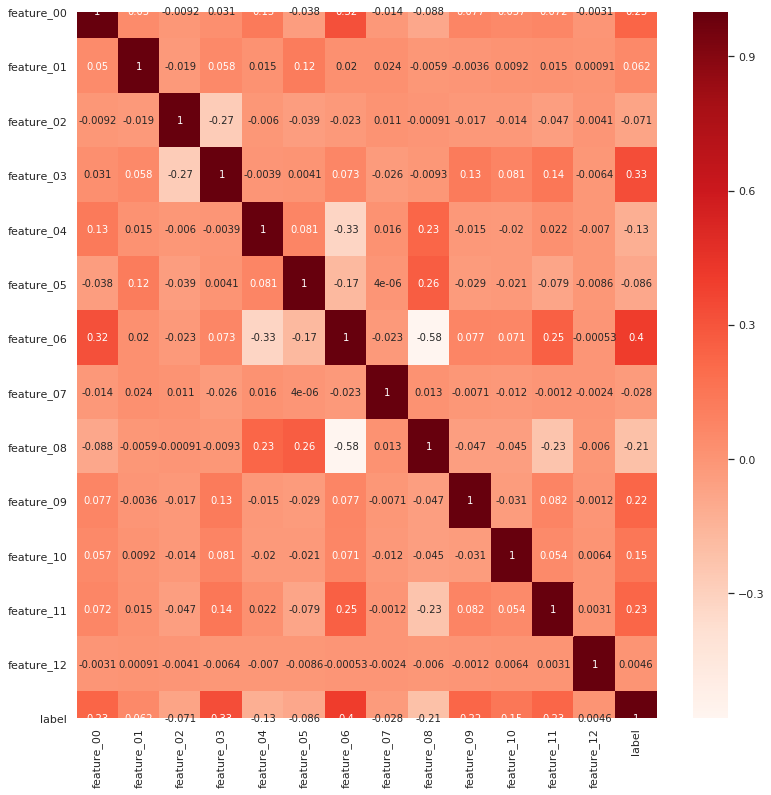

In [40]:
plt.figure(figsize=(13, 13))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [41]:
cor_target = abs(cor['label'])

# selecting highly correlated features
relevant_features = cor_target[cor_target > 0.2]
relevant_features

feature_00    0.230369
feature_03    0.332613
feature_06    0.403791
feature_08    0.214628
feature_09    0.223013
feature_11    0.227687
label         1.000000
Name: label, dtype: float64

Using the pairwise correlation, it seems feature 6 has the greatest correlation with the label. However, feature 3 may have a correlation as well. 

##### Random Forest Classifier
To use the random forest classifier, I first divided the data into the "feature" matrix and the "target" vector. After modeling the data with the random forest classifier, I visualized the feature importances in a figure. 

In [21]:
x_data = data_w_dummies.drop('label', axis=1)
x_data.shape

(48842, 13)

In [22]:
y_data = data_w_dummies['label']
y_data.shape

(48842,)

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
model.fit(x_data, y_data);

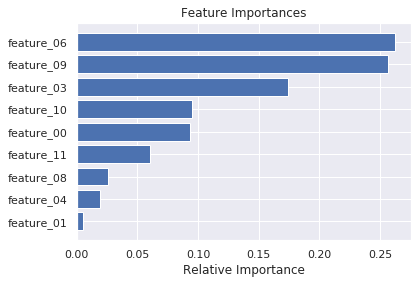

In [24]:
features = x_data.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the feature importances model and the previous pairwise correlation, it seems that feature 6 is the most important in explaining the final label values. However, features 9 and 3 may have some correlation with the final label values. 

### Dimensionality Reduction Techniques
The two dimensionality reduction techniques I chose to visualize the data set were:
1. Principal Component Analysis
2. Independent Component Analysis

##### Dimensionality Reduction: Principal Component Analysis

In [26]:
# standardizing data
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x_data)
x.shape

(48842, 13)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(x)

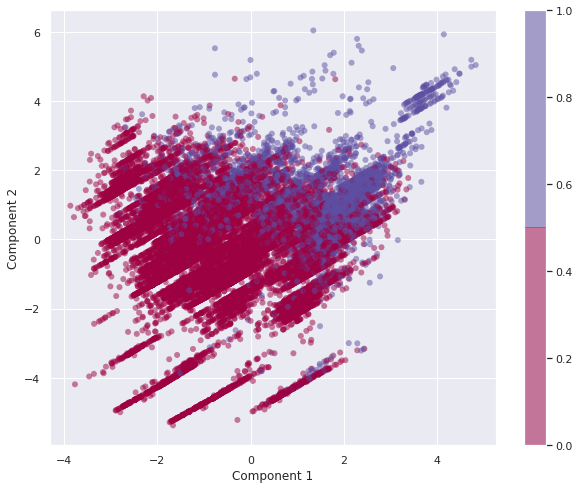

In [28]:
plt.figure(figsize=(10, 8))
plt.scatter(principal_comp[:, 0], principal_comp[:, 1],
           c=y_data, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2)
           )
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(); 

##### Dimensionality Reduction: Independent Component Analysis

In [163]:
from sklearn.decomposition import FastICA 
ICA = FastICA(n_components=2, random_state=12) 
X=ICA.fit_transform(x_data)

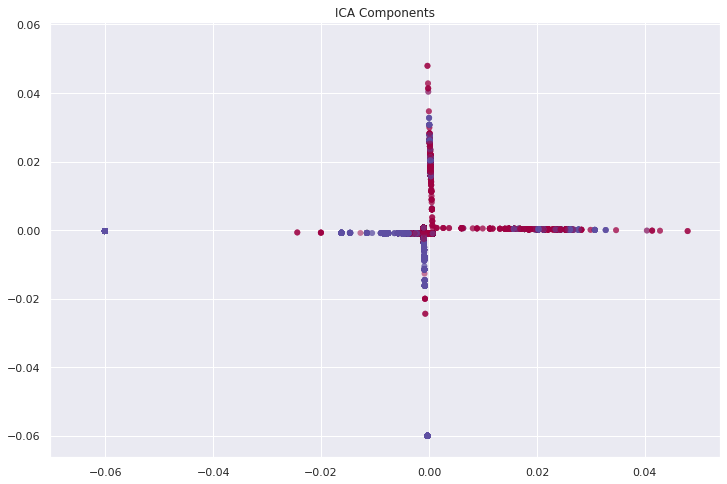

In [164]:
plt.figure(figsize=(12,8))
plt.title('ICA Components')
plt.scatter(X[:,0], X[:,1],
            c=y_data, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2)); 
plt.scatter(X[:,1], X[:,0],
            c=y_data, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2)); 

Both visualizations of the data dimensionally reduced indicated a large cross over section between label values. However, there seems to be a categorical distinction in the data between each label value given a large enough range in the components. 

## Part 3: Machine Learning
The task of part three was to experiment with various supervised
learning techniques for classification and ultimately find a short list of promising models for the data. 

The learning techniques I choose to experiement with were:
- Multinomial Naive Bayes
- Gaussian Naive Bayes
- Linear Regression
- K-Neighbors Classifier 
- Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Linear Discriminant Analysis
- Logistic Regression

My method with each technique was:
1. Import the model
2. Fit the model to the training data
3. Predict using the fitted model and test data
4. Get an accuracy score comparing the test data to the predicted data
5. Perform 5-fold cross validation
6. If the sklearn.metrics score was greater than 80, I would execute a classification report on the data.

Before performing any experimentation on the data, I split the data into training data and test data: 

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

Next, I used this data split into train and test with each of the chosen machine learning techniques. 

#### Multinomial Naive Bayes

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

model = MultinomialNB().fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7844201044119152


In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, x_data, y_data, cv=5)

array([0.7795066 , 0.78114444, 0.7775389 , 0.78224816, 0.78122441])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Based on the accuracy scores from the 5-fold cross validation, the Multinomial Naive Bayes model is inefficentive in modeling the given data if I intend my model to always have an accuracy score greater than 80 or 84. 

#### Gaussian Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8125703756781656


In [137]:
from sklearn.model_selection import cross_val_score
print("5-Fold Cross Validation Scores:", cross_val_score(model, x_data, y_data, cv=5))

5-Fold Cross Validation Scores: [0.79639677 0.80274337 0.79545455 0.80272318 0.79780917]


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      7472
           1       0.65      0.45      0.53      2297

    accuracy                           0.81      9769
   macro avg       0.75      0.69      0.71      9769
weighted avg       0.80      0.81      0.80      9769



Based on the metrics accuracy score, cross-validation scores, f1-score accuracy of 81, and recall macro avg of 81, the Gaussian Naive Bayes model sasitfactory at modeling the given data if I intend my model to always have an accuracy score greater than 80. Although it sometimes achieves an accuracy score of 80 with the test data, there may be better models for the data that can achieve an accuracy score above 84. 

#### Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("5-fold Cross Validation:", cross_val_score(model, x_test, y_test, cv=5))

5-fold Cross Validation: [0.31863824 0.32209584 0.29868814 0.31382587 0.30377416]


Based on the cross-validation scores that are less than 32, linear regression poorly models the data. This is due to the fact this data is categorical rather than continuous. 

#### K-Neighbors Classifier

To achieve greater accuracy when using the K-Neighbors Classifier, I scaled the train and test data using Scikit Learn's Standard Scaler:

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [127]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8322243832531477


In [128]:
print("5-Fold Cross Validation Scores:", cross_val_score(classifier, x_test, y_test, cv=5))

5-Fold Cross Validation Scores: [0.83785166 0.84757033 0.8202765  0.83000512 0.83768561]


In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7472
           1       0.67      0.55      0.61      2297

    accuracy                           0.83      9769
   macro avg       0.77      0.74      0.75      9769
weighted avg       0.82      0.83      0.83      9769



Based on the metrics accuracy score, cross-validation scores, f1-score accuracy of 83, and recall macro avg of 83, the k-neighbors classifier satisfactorily models the data if my goal accuracy score is 80 or greater. However, the k-neighbors classifier does not achieve an accuracy score of 84 or greater, thus, there may be better models for the data. 

#### Support Vector Classifier

In [123]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8422561162862114


In [124]:
print("5-Fold Cross Validation Scores:", cross_val_score(svclassifier, x_test, y_test, cv=5))

5-Fold Cross Validation Scores: [0.84245524 0.84961637 0.83307732 0.84280594 0.84485407]


In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7472
           1       0.75      0.49      0.60      2297

    accuracy                           0.84      9769
   macro avg       0.80      0.72      0.75      9769
weighted avg       0.83      0.84      0.83      9769



Based on the metrics accuracy score, cross-validation scores, f1-score accuracy of 84, and recall macro avg of 84, the support vector classifier satisfactorily models the data if my goal accuracy score is 80 or greater and 84 or greater. The support vector classifier the one of the most consistent accuracy score greater than 84. Thus, it may be one of the best models for the data. 

#### Decision Tree Classifier

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(x_train, y_train)
y_pred = dtclassifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8295629030607022


In [121]:
print("5-Fold Cross Validation Scores:", cross_val_score(dtclassifier, x_test, y_test, cv=5))

5-Fold Cross Validation Scores: [0.81994885 0.82762148 0.80645161 0.82130056 0.83051715]


In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7472
           1       0.67      0.54      0.60      2297

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.74      9769
weighted avg       0.82      0.83      0.82      9769



Based on the metrics accuracy score, cross-validation scores, f1-score accuracy of 83, and recall macro avg of 83, the decision tree classifier does a satisfactory job at modeling the data if my goal accuracy score is 80 or greater. However, the decision tree classifier does not achieve an accuracy score of 84 or greater, thus, there may be better models for the data. 

#### Linear Discriminant Analysis

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy:', lda.score(X_test, y_test))

Accuracy: 0.8303818200429931


In [118]:
print("5-Fold Cross Validation Scores:", cross_val_score(lda, x_test, y_test, cv=5))

5-Fold Cross Validation Scores: [0.83324808 0.84143223 0.81464414 0.82590886 0.83154122]


In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7472
           1       0.74      0.40      0.52      2297

    accuracy                           0.83      9769
   macro avg       0.79      0.68      0.71      9769
weighted avg       0.82      0.83      0.81      9769



Based on the metrics accuracy score, cross-validation scores, f1-score accuracy of 83, and recall macro avg of 83, linear discriminant analysis does a satisfactory job at modeling the data if my goal accuracy score is 80 or greater. However, linear discriminant analysis does not achieve an accuracy score of 84 or greater, thus, there may be better models for the data. 

#### Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier

rfclassifier = RandomForestClassifier(max_depth=2, random_state=0)

rfclassifier.fit(X_train, y_train)
y_pred = rfclassifier.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8262872351315386


/opt/tljh/user/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [114]:
print("5-Fold Cross Validation Scores:", cross_val_score(rfclassifier, x_test, y_test, cv=5))

5-Fold Cross Validation Scores: [0.80204604 0.80204604 0.79825909 0.80133129 0.79928315]


In [115]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7472
           1       0.74      0.40      0.52      2297

    accuracy                           0.83      9769
   macro avg       0.79      0.68      0.71      9769
weighted avg       0.82      0.83      0.81      9769



Based on the metrics accuracy score, cross-validation scores, f1-score accuracy of 83, and recall macro avg of 83, the random forest classifier does a satisfactory job at modeling the data if my goal accuracy score is 80 or greater. Yet, it does so inconsistely as shown by its cross validation scores. However, the random forest classifier does not achieve an accuracy score of 84 or greater, thus, there may be better models for the data. 

In [167]:
from sklearn.linear_model import LogisticRegression
lrclassifier = LogisticRegression(solver='lbfgs')
lrclassifier.fit(x_train, y_train)
y_pred = lrclassifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8422561162862114


In [168]:
print("5-Fold Cross Validation Scores:", cross_val_score(lrclassifier, x_test, y_test, cv=5))

5-Fold Cross Validation Scores: [0.8455243  0.84961637 0.82744496 0.84075781 0.8484383 ]


In [112]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7472
           1       0.73      0.52      0.61      2297

    accuracy                           0.84      9769
   macro avg       0.80      0.73      0.76      9769
weighted avg       0.83      0.84      0.83      9769



Based on the metrics accuracy score, cross-validation scores, f1-score accuracy of 84, and recall macro avg of 84, logistic regression satisfactorily models the data if my goal accuracy score is 80 or greater and 84 or greater. Logistic regression achieves the one of the most consistent accuracy score greater than 84. Thus, it may be one of the best models for the data. 

#### Part 3 Analysis

Based on the results of each machine learning technique, in order to achieve an accuracy score the most consistently greater than 84, the best models for the data may be __logistic regression__ (Accuracy > 84) and __support vector classifier__ (Accuracy > 84). <br>

Other models that may sufficiently model the data are:
- Linear Discriminant Analysis (Accuracy > 83)
- Decision Tree Classifier (Accuracy > 82)
- K-Neighbor Classifier (Accuracy > 83)
- Gaussian Naive Bayes (Accuracy > 81)